In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('husl')

In [133]:
df = pd.read_csv('data/processed.csv', index_col=0, dtype={'key': str, 'title': str, 'authors': str, 'abstract': str, 'year_published': int, 'tags': object})
df.tags = df.tags.str.strip("[]").str.replace(r"\s*|'", '').str.split(',')
df.head()

/var/folders/1y/6byzw1px62g2f5w7p_rhb6kh0000gn/T/ipykernel_5176/1523540997.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df.tags = df.tags.str.strip("[]").str.replace(r"\s*|'", '').str.split(',')


,key,title,authors,abstract,year_published,tags,category,skills,types,lang_family
0,rayyan-354359269,An experience of automated assessment in a lar...,"Zampirolli F.A., Borovina Josko J.M., Venero M...",The 2020 pandemic imposed new demands on teach...,2021,"[data_available:False, technique:pre_defined_q...",['dynamic'],['correctness'],"['description', 'evaluation']",['OOP']
1,rayyan-354359270,Semiautomatic generation and assessment of Jav...,"Insa D., Pérez S., Silva J., Tamarit S.",Continuous assessment is essential in educatio...,2021,"[evaluation:auto_grading, approach:semi_automa...","['dynamic', 'static']","['correctness', 'maintainability']","['description', 'evaluation']",['OOP']
2,rayyan-354359271,A tool for evaluating computer programs from s...,"Vaneck Q., Colart T., Frénay B., Vanderose B.",Computer science studies are more and more pop...,2021,"[data_available:False, tool:pylint, language:p...",['static'],"['readability', 'maintainability']",['description'],['OOP']
3,rayyan-354359272,Virtual Teaching Assistant for Grading Program...,"Chou C.-Y., Chen Y.-J.",This study proposes an automated programming a...,2021,"[data_available:False, skill:correctness, inte...","['dynamic', 'static']",['correctness'],"['description', 'evaluation']",['Unknown']
4,rayyan-354359273,Analysis of an automatic grading system within...,"Hegarty-Kelly E., Mooney D.A.",Reliable and pedagogically sound automated fee...,2021,"[data_available:False, skill:correctness, inte...","['dynamic', 'static']","['correctness', 'readability']","['description', 'evaluation']",['OOP']


# Interesting Papers
## Skill Papers
### Correctness

In [134]:
temp_df = df[df.skills.str.contains("^\['correctness'\]$")].copy()
temp_df['tech'] = df.tags.apply(lambda labels: [label for label in labels if label.startswith('technique')])
temp_df[['key', 'title', 'category', 'tech']]

,key,title,category,tech
0,rayyan-354359269,An experience of automated assessment in a lar...,['dynamic'],"[technique:pre_defined_questions, technique:un..."
3,rayyan-354359272,Virtual Teaching Assistant for Grading Program...,"['dynamic', 'static']","[technique:output_matching, technique:unit_tes..."
5,rayyan-354359274,Evaluating Control-Flow Graph Similarity for G...,['static'],"[technique:model_solution_req, technique:patte..."
7,rayyan-354359277,An interactive feedback system for grammar dev...,['dynamic'],"[technique:unit_testing, technique:trace_exami..."
8,rayyan-354359278,Combining dynamic and static analysis for auto...,"['dynamic', 'static']","[technique:unit_testing, technique:model_solut..."
...,...,...,...,...
115,rayyan-354359408,ArTEMiS - An automatic assessment management s...,['dynamic'],"[technique:unit_testing, technique:ci_cd]"
116,rayyan-354359409,Linkage objects for generalized instruction in...,"['static', 'machine learning']","[technique:machine_learning, technique:pattern..."
117,rayyan-354359410,Automated data-driven hints for computer progr...,['dynamic'],[technique:unit_testing]
118,rayyan-354359411,Learning and teaching numerical methods with a...,"['dynamic', 'static']","[technique:unit_testing, technique:matching_ru..."


In [135]:
(temp_df.shape[0] / df.shape[0]) * 100

60.65573770491803

In [136]:
temp_df.category.value_counts()

['dynamic']                        39
['static']                         16
['dynamic', 'static']              13
['static', 'machine learning']      3
['dynamic', 'machine learning']     1
['machine learning']                1
['misc']                            1
Name: category, dtype: int64

In [137]:
(temp_df.category.value_counts() / temp_df.shape[0]) * 100

['dynamic']                        52.702703
['static']                         21.621622
['dynamic', 'static']              17.567568
['static', 'machine learning']      4.054054
['dynamic', 'machine learning']     1.351351
['machine learning']                1.351351
['misc']                            1.351351
Name: category, dtype: float64

In [138]:
temp_df['only_dynamic'] = df.category.apply(lambda x: 'dynamic' in str(x) and 'static' not in str(x) and 'machine learning' not in str(x))
(temp_df[temp_df.only_dynamic].explode('tech').tech.value_counts() / temp_df[temp_df.only_dynamic].shape[0]) * 100

technique:unit_testing                100.000000
technique:ci_cd                        12.820513
technique:model_solution_req           10.256410
technique:trace_examination             5.128205
technique:property_based_testing        5.128205
technique:pre_defined_questions         2.564103
technique:unit_test_expansion           2.564103
technique:mutation_testing              2.564103
technique:test_case_generation          2.564103
technique:novel                         2.564103
technique:gui_testing                   2.564103
technique:output_matching               2.564103
technique:program_synthesis             2.564103
technique:code_repair_for_feedback      2.564103
technique:knowledge_base                2.564103
Name: tech, dtype: float64

### Readability

In [139]:
temp_df = df[df.skills.str.contains("^\['readability'\]$")]
temp_df[['key', 'title', 'skills']]

,key,title,skills
12,rayyan-354359284,Using an interactive software tool for the for...,['readability']
30,rayyan-354359306,The impact of automated code quality feedback ...,['readability']
77,rayyan-354359360,Promoting Code Quality via Automated Feedback ...,['readability']
79,rayyan-354359362,Measure Students’ Contribution in Web Programm...,['readability']
103,rayyan-354359393,Analysing hint based problem solving strategy ...,['readability']
108,rayyan-354359398,Static analyses in python programming courses,['readability']


# Novelty of Research

In [140]:
novel_df = df[['year_published','category', 'skills']].copy()
novel_df.head()

,year_published,category,skills
0,2021,['dynamic'],['correctness']
1,2021,"['dynamic', 'static']","['correctness', 'maintainability']"
2,2021,['static'],"['readability', 'maintainability']"
3,2021,"['dynamic', 'static']",['correctness']
4,2021,"['dynamic', 'static']","['correctness', 'readability']"


In [141]:
# Probably have to rethink how I have done this...
def assign_skill_cat_combo(categories, skills):
    combos = []
    if 'correctness' in skills and 'dynamic' in categories:
        combos.append('correctness_dynamic')
    if 'correctness' in skills and 'static' in categories:
        combos.append('correctness_static')
    if 'correctness' in skills and 'machine learning' in categories:
        combos.append('correctness_ml')
    if 'maintainability' in skills and 'dynamic' in categories:
        combos.append('maintainability_dynamic')
    if 'maintainability' in skills and 'static' in categories:
        combos.append('maintainability_static')
    if 'maintainability' in skills and 'machine learning' in categories:
        combos.append('maintainability_ml')
    if 'readability' in skills and 'dynamic' in categories:
        combos.append('readability_dynamic')
    if 'readability' in skills and 'static' in categories:
        combos.append('readability_static')
    if 'readability' in skills and 'machine learning' in categories:
        combos.append('readability_ml')
    if 'documentation' in skills and 'dynamic' in categories:
        combos.append('documentation_dynamic')
    if 'documentation' in skills and 'static' in categories:
        combos.append('documentation_static')
    if 'documentation' in skills and 'machine learning' in categories:
        combos.append('documentation_ml')
    return combos

In [142]:
novel_df = novel_df.fillna('empty')
novel_df['combo'] = novel_df.apply(lambda x: assign_skill_cat_combo(x.category, x.skills), axis=1).explode('combo')

novel_df

,year_published,category,skills,combo
0,2021,['dynamic'],['correctness'],correctness_dynamic
1,2021,"['dynamic', 'static']","['correctness', 'maintainability']",correctness_dynamic
2,2021,['static'],"['readability', 'maintainability']",correctness_static
3,2021,"['dynamic', 'static']",['correctness'],maintainability_dynamic
4,2021,"['dynamic', 'static']","['correctness', 'readability']",maintainability_static
...,...,...,...,...
117,2017,['dynamic'],['correctness'],readability_dynamic
118,2017,"['dynamic', 'static']",['correctness'],correctness_dynamic
119,2017,['dynamic'],"['correctness', 'maintainability']",correctness_dynamic
120,2017,"['static', 'machine learning']","['readability', 'maintainability']",correctness_static


In [143]:
df.shape

(122, 10)

In [144]:
novel_df_grp = novel_df.drop(columns=['category', 'skills'])
novel_df_grp = novel_df_grp.groupby('year_published').value_counts().reset_index()
novel_df_grp.columns = ['year_published', 'combo', 'number']
novel_df_grp['proportion'] = (novel_df_grp.number / novel_df.shape[0]) * 100
novel_df_grp

,year_published,combo,number,proportion
0,2017,correctness_static,6,4.918033
1,2017,readability_dynamic,5,4.098361
2,2017,correctness_dynamic,5,4.098361
3,2017,readability_static,2,1.639344
4,2017,correctness_ml,1,0.819672
5,2017,maintainability_static,1,0.819672
6,2018,correctness_dynamic,10,8.196721
7,2018,correctness_static,6,4.918033
8,2018,readability_static,3,2.459016
9,2018,readability_dynamic,2,1.639344


<AxesSubplot: xlabel='year_published', ylabel='number'>

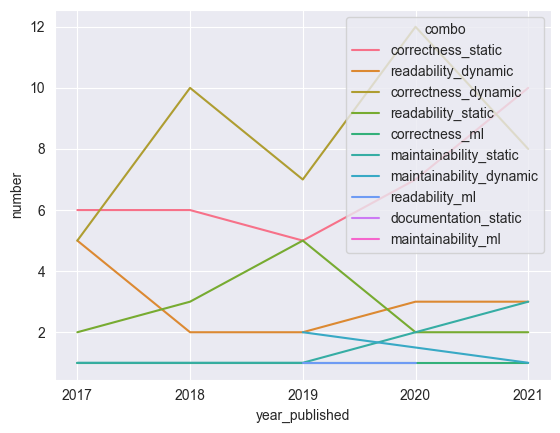

In [145]:
novel_df_grp.year_published = novel_df_grp.year_published.astype('str')
sns.lineplot(novel_df_grp, x='year_published', y='number', hue='combo')

<AxesSubplot: xlabel='year_published', ylabel='combo'>

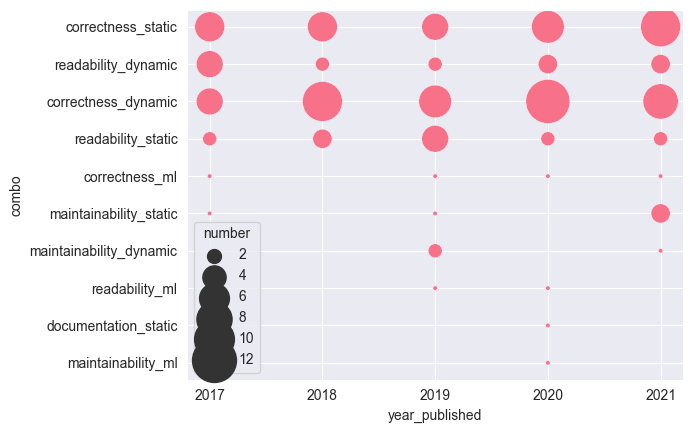

In [146]:
sns.scatterplot(novel_df_grp, x='year_published', y='combo', size='number', sizes=(10, 1000))